In [46]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

<b>Teste Anova e Tukey</b>
<hr>
Teste se existe diferenças entre as médias das variáveis contínuas entre grupos diferentes (mais de 3).

In [48]:
df = pd.read_csv('anova.csv', sep=';')
df.head(5)

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7


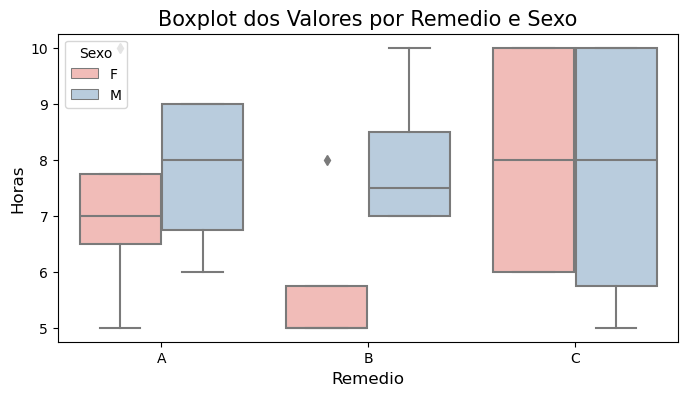

In [69]:
# Configurações do gráfico
plt.figure(figsize=(8, 4))

# Criação do boxplot separado por categoria e sexo
sns.boxplot(x='Remedio', y='Horas', hue='Sexo', data=df, palette='Pastel1')

# Adicionando título e legendas
plt.title('Boxplot dos Valores por Remedio e Sexo', fontsize=15)
plt.xlabel('Remedio', fontsize=12)
plt.ylabel('Horas', fontsize=12)
plt.legend(title='Sexo')

plt.show()

In [72]:
# Criação do modelo de regressão linear
modelo1 = ols('Horas ~ Remedio', data = df).fit() # Variável dependente = Horas; Variável independente = Remedios
resultados1 = sm.stats.anova_lm(modelo1)
resultados1

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


P-value > 0.05: Não é possível rejeitar a hipótese nula de que não há diferença significativa

In [74]:
modelo2 = ols('Horas ~ Remedio * Sexo', data = df).fit() # Variável dependente = Horas; Variável independente = considerando 2 fatores Remedios e Sexo
resultados2 = sm.stats.anova_lm(modelo2)
resultados2

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.532609,0.596042
Sexo,1.0,4.166667,4.166667,1.086957,0.310948
Remedio:Sexo,2.0,6.583333,3.291667,0.858696,0.440360
Residual,18.0,69.000000,3.833333,NaN,NaN


Nenhum valor de P mostra diferença significativa

Se houvesse diferença executaremos o teste de Tukey, para indicar onde há diferença 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper reject
-------------------------------------------------
     A      B   -0.625 0.7991 -3.081 1.831  False
     A      C    0.375 0.9219 -2.081 2.831  False
     B      C      1.0 0.5689 -1.456 3.456  False
-------------------------------------------------


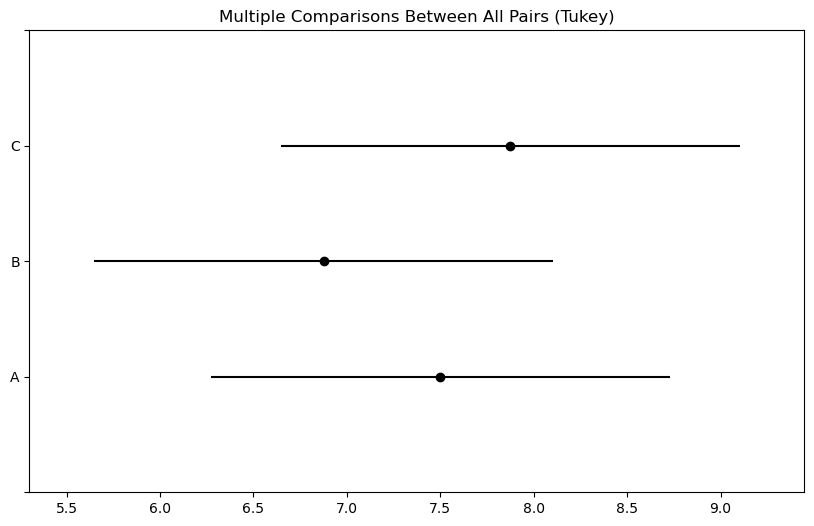

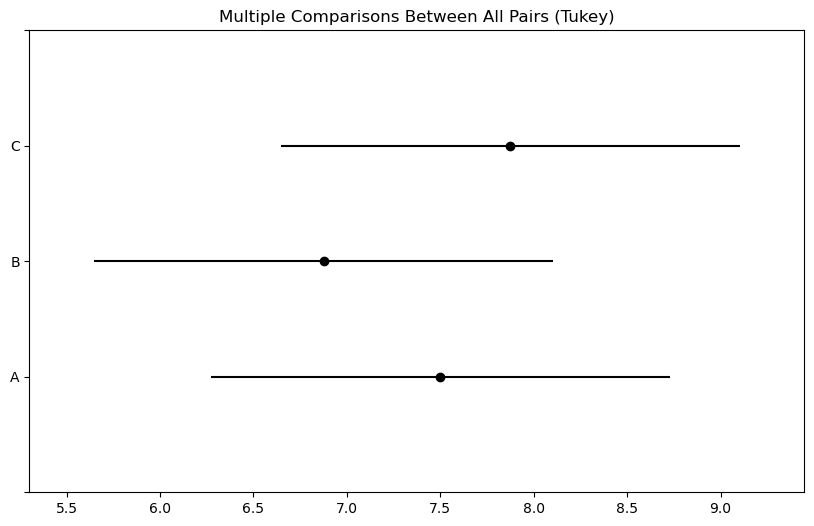

In [75]:
mc = MultiComparison(df['Horas'], df['Remedio'])
resultado_teste = mc.tukeyhsd()
print(resultado_teste)
resultado_teste.plot_simultaneous()